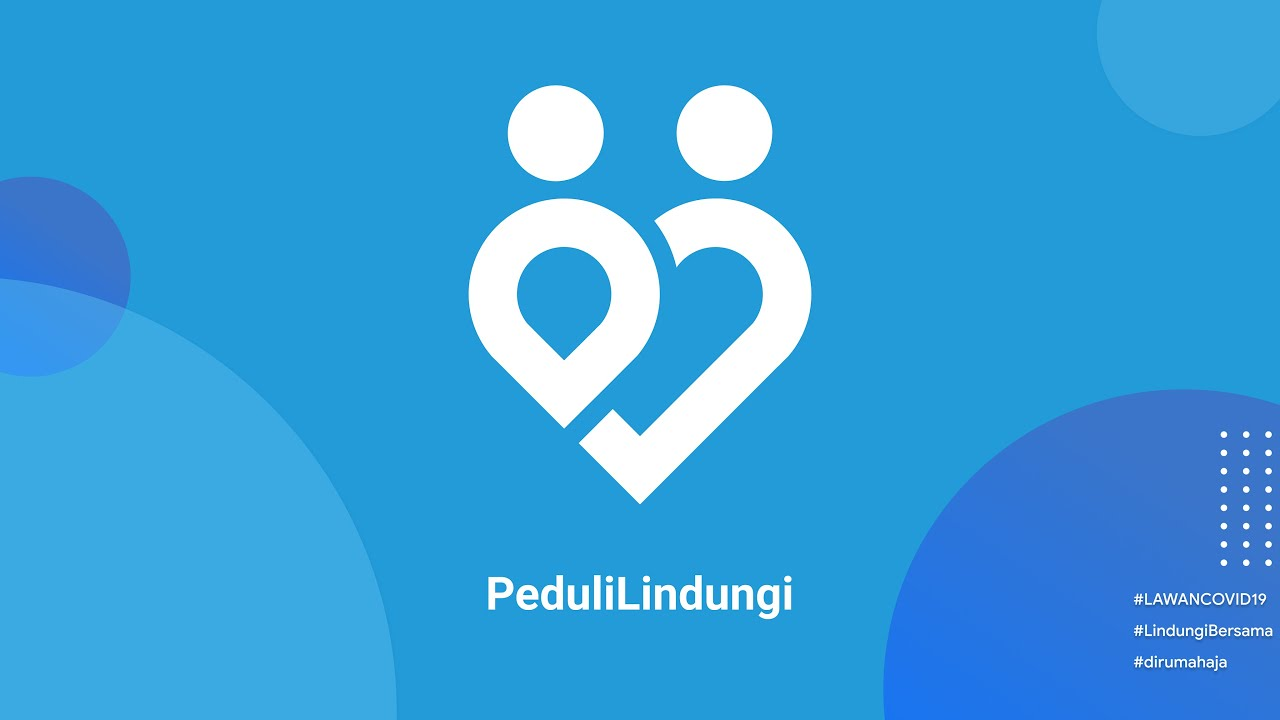

# PERSIAPAN MODULE
# Metode Naive Bayes

* Ini Menggunakan Split 80 20


In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
from sklearn.pipeline import Pipeline
print('module ready')

module ready


In [89]:
# load data
dataset = pd.read_csv('scrapped_data - dataset_sentiment_apps_peduli_with_categorical - scrapped_data - dataset_sentiment_apps_peduli_with_3_categorical.csv')

In [90]:
# melihat 100 data pertama
dataset.head(100)

,userName,score,Value,at,content
0,Christine Napitupulu,2,Negative,2022-04-23 12:19:40,Saya mau download sertifikat vaksin perjalanan...
1,Alle Jandro,2,Negative,2022-04-23 11:20:59,"Warna masih merah, padahal sudah vaksin sampai..."
2,Sinta Aliyudin,1,Negative,2022-04-23 07:20:02,Saya sudah vaksin ke 3 tapi sertifikat tidak a...
3,Suci Anti,2,Negative,2022-04-23 07:12:08,Tolong diperbaikiii lagi please....! Gak semua...
4,Lina Karlina,1,Negative,2022-04-23 06:41:18,"Tolong yg buat aplikasinya perbaiki lagi, masa..."
...,...,...,...,...,...
95,Lita Marbun,2,Negative,2022-04-15 22:40:59,Knp aplikasi ini tdk bs di download ulang di h...
96,Komaruddin Almughni,2,Negative,2022-04-15 22:11:58,Untuk menu tanggal lahir nya gk bisa itomatis ...
97,yanni srimulyani,1,Negative,2022-04-15 21:50:45,kenapa gak bisa daftar.. padahal sebelumnya bi...
98,Gombloh chanel,1,Negative,2022-04-15 21:06:04,"Aplikasi yg harusnya di habus saja, bikin ribe..."


In [91]:
# melihat 100 data terakhir
dataset.tail(100)

,userName,score,Value,at,content
900,c.lexmanata,2,Negative,2022-02-06 04:03:51,Maaf Bintang 2 mind.. saran saya kalau bisa Ap...
901,Ilham Rinanda,1,Negative,2022-02-06 02:18:30,Pengembangan Aplikasi buruk. Dah ribet. Ngapai...
902,yunus kamid,4,Positive,2022-02-05 20:16:31,"Udah di vaksin yang pertama per 19 Mey 2021, t..."
903,Adriana Iftita,3,Netral,2022-02-05 10:33:25,Tolong untuk sistem nya diperbaiki. Hasil PCR ...
904,Marlin Marianta,1,Negative,2022-02-05 08:19:28,"aplikasi lemot,, kadang mau kadang engga,, tru..."
...,...,...,...,...,...
995,Slamet Gass,1,Negative,2021-12-09 12:18:16,Aplikasi sering bermasalah. Tidak bisa di buka...
996,Fa_nia R,3,Netral,2021-11-25 09:53:31,"Min ijin bertanya, kenapa setiap akan scan bar..."
997,Irvan Oktavianus,1,Negative,2021-11-24 09:48:44,"Aplikasi masih tidak stabil, setiap dipakai sc..."
998,Ika Ayu Indriani,3,Netral,2021-11-24 08:21:14,Mohon untuk aplikasi peduli lindungi diperbaik...


# TAHAP PREPROCESSING DATA

* Proses Cleaning Data

In [92]:
# proses case folding
import re
dataset.drop(columns=['at','userName','score'],inplace = True) # untuk menghilangkan colums yang tidak di perlukan
def casefolding(content) :
  content = content.lower()  # agar semua coment menjadi huruf kecil semua
  content = content.strip(" ") # menghilangkan subah
  content = re.sub(r'[?|$|.|!2_:")(-+,]','',content) # menghilangan tanda yang tidak di perlukan
  return content
dataset['content'] = dataset['content'].apply(casefolding)

In [93]:
# melihat 100 data pertama hasil dari filtering
dataset.head(100) 

,Value,content
0,Negative,saya mau download sertifikat vaksin perjalanan...
1,Negative,warna masih merah padahal sudah vaksin sampai ...
2,Negative,saya sudah vaksin ke 3 tapi sertifikat tidak a...
3,Negative,tolong diperbaikiii lagi please gak semua hp p...
4,Negative,tolong yg buat aplikasinya perbaiki lagi masa ...
...,...,...
95,Negative,knp aplikasi ini tdk bs di download ulang di h...
96,Negative,untuk menu tanggal lahir nya gk bisa itomatis ...
97,Negative,kenapa gak bisa daftar padahal sebelumnya bisa...
98,Negative,aplikasi yg harusnya di habus saja bikin ribet...


In [94]:
# melihat 100 data terakhir hasil dari filtering
dataset.tail(100)

,Value,content
900,Negative,maaf bintang mind saran saya kalau bisa aplik...
901,Negative,pengembangan aplikasi buruk dah ribet ngapain ...
902,Positive,udah di vaksin yang pertama per 19 mey 01 tapi...
903,Netral,tolong untuk sistem nya diperbaiki hasil pcr s...
904,Negative,aplikasi lemot kadang mau kadang engga trus se...
...,...,...
995,Negative,aplikasi sering bermasalah tidak bisa di buka ...
996,Netral,min ijin bertanya kenapa setiap akan scan barc...
997,Negative,aplikasi masih tidak stabil setiap dipakai sca...
998,Netral,mohon untuk aplikasi peduli lindungi diperbaik...


* Proses Tokenizing

In [95]:
# proses tokenizing membuat kata menjadi berurutan atau dipisah
# contoh : aku, kamu, dia
def token(content) :
  nstr = content.split(' ')
  dat = [ ]
  a = -1

  for hu in nstr :
    a = a + 1
    if hu == ' ' :
      dat.append(a)
    p = 0
    b = 0
    for q in dat :
      b = q - p 
      del nstr[b]
      p = p + 1
    return nstr
dataset['content'] = dataset['content'].apply(token)

In [96]:
# melihat 100 data pertama hasil tokenizing
dataset.head(100)

,Value,content
0,Negative,"[saya, mau, download, sertifikat, vaksin, perj..."
1,Negative,"[warna, masih, merah, padahal, sudah, vaksin, ..."
2,Negative,"[saya, sudah, vaksin, ke, 3, tapi, sertifikat,..."
3,Negative,"[tolong, diperbaikiii, lagi, please, gak, semu..."
4,Negative,"[tolong, yg, buat, aplikasinya, perbaiki, lagi..."
...,...,...
95,Negative,"[knp, aplikasi, ini, tdk, bs, di, download, ul..."
96,Negative,"[untuk, menu, tanggal, lahir, nya, gk, bisa, i..."
97,Negative,"[kenapa, gak, bisa, daftar, padahal, sebelumny..."
98,Negative,"[aplikasi, yg, harusnya, di, habus, saja, biki..."


In [97]:
# melihat 100 data terakhir hasil tokenizing
dataset.tail(100)

,Value,content
900,Negative,"[maaf, bintang, , mind, saran, saya, kalau, bi..."
901,Negative,"[pengembangan, aplikasi, buruk, dah, ribet, ng..."
902,Positive,"[udah, di, vaksin, yang, pertama, per, 19, mey..."
903,Netral,"[tolong, untuk, sistem, nya, diperbaiki, hasil..."
904,Negative,"[aplikasi, lemot, kadang, mau, kadang, engga, ..."
...,...,...
995,Negative,"[aplikasi, sering, bermasalah, tidak, bisa, di..."
996,Netral,"[min, ijin, bertanya, kenapa, setiap, akan, sc..."
997,Negative,"[aplikasi, masih, tidak, stabil, setiap, dipak..."
998,Netral,"[mohon, untuk, aplikasi, peduli, lindungi, dip..."


# Proses Filtering
* Proses ini bertujuan untuk menghilangkan kata kata yang tidak bermanfaat dan menyimpan kata kata yang tidak bermanfaat
* disini kita menghilangkan kata hubung seperti di ke yang dan kata hubung hhs inggris lainya
* module yag digunakan adalah stopwords

In [98]:
# proses filtering
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# membuat fungsi untuk menghilangkan kata kata yang tidak di inginkan
def stopwords_removal(content) :
  filtering = stopwords.words('indonesian','english') # disini mendeteksi 2 bahasa yaitu inggris dan indonesia
  x = []
  data = []
  def myFunc(x) :
      if x in filtering :
        return False
      else :
        return True
  fit = filter(myFunc, content)
  for x in fit :
    data.append(x)
  return data
dataset['content'] = dataset['content'].apply(stopwords_removal)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [99]:
# melihat 100 data pertama hasil filtering
dataset.head(100)

,Value,content
0,Negative,"[download, sertifikat, vaksin, perjalanan, neg..."
1,Negative,"[warna, merah, vaksin, 3, boosterjadi, susah, ..."
2,Negative,"[vaksin, 3, sertifikat, aplikasi, coba, ikutin..."
3,Negative,"[tolong, diperbaikiii, please, gak, hp, versi,..."
4,Negative,"[tolong, yg, aplikasinya, perbaiki, sertifikat..."
...,...,...
95,Negative,"[knp, aplikasi, tdk, bs, download, ulang, hp, ..."
96,Negative,"[menu, tanggal, lahir, nya, gk, itomatis, nget..."
97,Negative,"[gak, daftar, mentok, tgl, lahir, ku, kelahira..."
98,Negative,"[aplikasi, yg, habus, bikin, ribet, , scan, ot..."


In [100]:
# melihat 100 data terakhir hasil filtering
dataset.tail(100)

,Value,content
900,Negative,"[maaf, bintang, , mind, saran, aplikasi, memas..."
901,Negative,"[pengembangan, aplikasi, buruk, dah, ribet, ng..."
902,Positive,"[udah, vaksin, 19, mey, 01, aplikasi, pedulili..."
903,Netral,"[tolong, sistem, nya, diperbaiki, hasil, pcr, ..."
904,Negative,"[aplikasi, lemot, kadang, kadang, engga, trus,..."
...,...,...
995,Negative,"[aplikasi, bermasalah, buka, force, close, sus..."
996,Netral,"[min, ijin, scan, barcode, muncul, notifikasi,..."
997,Negative,"[aplikasi, stabil, dipakai, scan, qr, stasiun,..."
998,Netral,"[mohon, aplikasi, peduli, lindungi, diperbaiki..."


# Proses Steaming
* jika di dalam bahasa inggris proses ini bertujuan mengubah kata menjadi kata dasar seperti verb 3 ke verb 1 contoh seen menjadi see
* jika di dalam bahasa indonesia proses ini bertujuan untuk menghilangkan imbuhan contohnya mencuci menjadi cuci melihat menjadi lihat

In [103]:
# membuat metode stemming
# perispaan module
!pip install Sastrawi # digunakan untuk melakukan stemming
from sklearn.pipeline import Pipeline
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# persiapan module selesai

# membuat fungsi model stemmer

def stemming(content):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []

  for w in content :
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ". join(do)
  print(d_clean)
  return d_clean
dataset['content'] = dataset['content'].apply(stemming)

# mengkonvert data yang sudah jadi dan bersih ke file baru
dataset.to_csv('dataset_clean.csv', index = False)
dataset_clean = pd.read_csv('dataset_clean.csv', encoding = 'latin1')

dataset_clean.head()

download sertifikat vaksin jalan negeri hasil folder mana bentuk pdf image mohon bantu berangkat negeri
warna merah vaksin 3 boosterjadi susah kalo pergi publik kontak 119 susah banget hubung wa kemenkes membantubingung biar status ubah
vaksin 3 sertifikat aplikasi coba ikutin muncul tgl yg masuk sesuai tulis sesuai vaksin
tolong diperbaikiii please gak hp versi android terbarudi handpone ibu gak download aplikasi inikatanya perangkat mendukungtrus klo ditnya n suruh scan klo mudik gimana caranyaa sulit sulit kasi
tolong yg aplikasi baik sertifikat aja klaim sih kalalendernya opsi dtulis manual nggak yg vaksin lahir tahun 01 yg lahir 90 an jdi susah lma lgi milih tahun mundur kagak klaim sertifikat coba kgk kayak gampang ga klaim udh vaksin langsung muncul sertifikat
bikin aplikasi ga sih masukin tanggal lahir aja susah bener gara tampil kayak gitu mencet tahun udah
apk scang qr dimall yapadahal udah baru notif baru tolong bantu kemarin masuk mall gara
min aplikasi check in gak notifik

In [105]:
# melihat type data yang sudah di cleaning
data_clean = dataset_clean.astype({'Value' : 'category'}) # ini menginisialisasikan categori netagif netral atau positive
data_clean = data_clean.astype({'content' : 'string'}) 
data_clean.dtypes

Value      category
content      string
dtype: object

In [120]:
# melihat data clean
data_clean.head()

,Value,content
0,Negative,download sertifikat vaksin jalan negeri hasil ...
1,Negative,warna merah vaksin 3 boosterjadi susah kalo pe...
2,Negative,vaksin 3 sertifikat aplikasi coba ikutin muncu...
3,Negative,tolong diperbaikiii please gak hp versi androi...
4,Negative,tolong yg aplikasi baik sertifikat aja klaim s...


1000


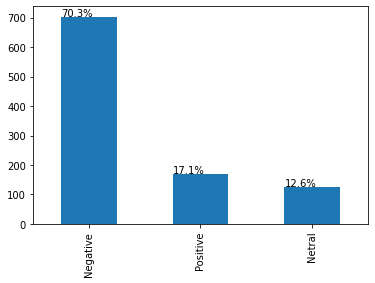

In [122]:
# memvisualisasikan datanya
data_visualisasi = pd.value_counts(data_clean['Value'])
ax = data_visualisasi.plot.bar()
visualisasi = len(data_clean.index)
print(visualisasi)

for p in ax.patches :
  ax.annotate(str(round(p.get_height() / visualisasi * 100, 2)) + '%', (p.get_x() * 1.005, p.get_height() * 1.005))

# Kesimpulan Bedasarkan visualisasi data dimana dapat dilihat bahwa berdasarkan review masyarakat mengenai aplikasi peduli lindungi masih banyak masyarakat yang memberikan komentar netagif terhadap aplikasi terseut 

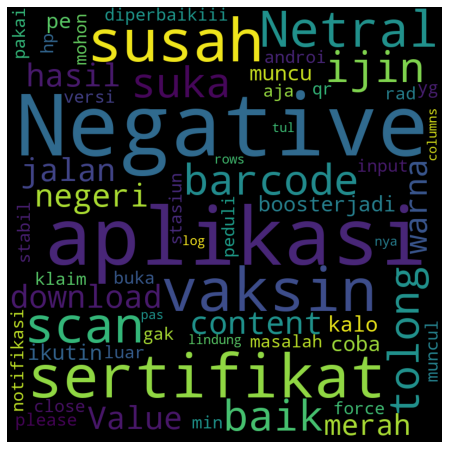

In [130]:
# Visulaisasi dengan grafik gambar untuk melihat kata yang paling sering muncur
! pip install wordcloud
from wordcloud import WordCloud 

wordcloud = WordCloud(width = 800, height = 800, background_color = 'black', max_words = 1000
                      ,min_font_size = 20).generate(str(data_clean))

# visualisasi wordclud yang negatif
fig = plt.figure(figsize = ( 8, 8), facecolor= None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

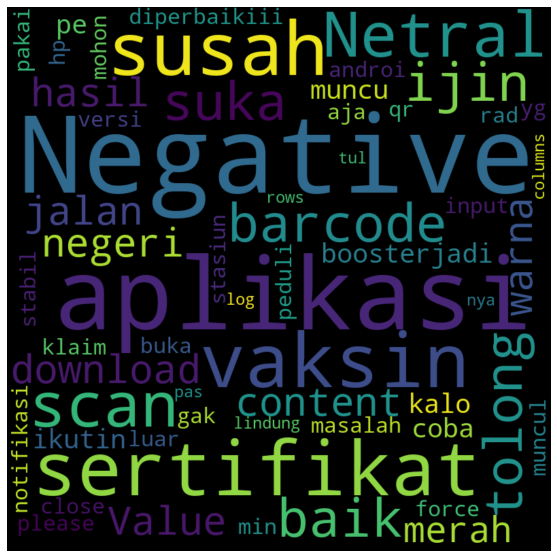

In [145]:
def generate_wordcloud(all_word) :
    global WordCloud
    wordcloud = WordCloud(width = 800, height = 500, random_state = 42, max_font_size = 100, relative_scaling = 0.5, background_color='black')


all_word = ' '.join([text for text in data_clean['content'][data_clean.Value == 'Negative']])
generate_wordcloud(all_word) 

# visualisasi semua wordclud 
fig = plt.figure(figsize = ( 14, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Proses TF-IDF
* proses untuk memberikian suatu bobot pada kata yang anda dimana semakin banyak kata pada suatu dokumen maka semakin tinggil nilai bobotnya contohnya seperti ini ( misalnya da dokumen yang memilki kata berulang dalam satu dokumen contoh terdapat kata berulang ekonomi sebanyak 5 kali makan akan memiliki bobot yang lebih tinggi dari pada kata lain yang tidak berulang sebanyak 5 kali )


In [106]:
# proses IT-IDF 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()
text_tf = tf.fit_transform(data_clean['content'].astype('U'))
text_tf
# tidak akan dimunculkan karena datanya lumayan banyak

<1000x3346 sparse matrix of type '<class 'numpy.float64'>'
	with 18333 stored elements in Compressed Sparse Row format>

# Spliiting data dengan Metode 80 20
* 80 % digunakan untuk data training
* 20 % digunakan untuk data testing


In [108]:
# spliiting data
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(text_tf, data_clean['Value'], test_size = 0.2, random_state = 42) # di akan di ambil secara random di dalam 20% data test 


In [119]:
# performa algortima naive bayes
from sklearn.naive_bayes import MultinomialNB # ini module dalam perhitungan Nive Bayes
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = MultinomialNB().fit(X_train, Y_train)
predicted = clf.predict(X_test)

# menampilakan Model naive Bayes

print("MultinominalNB Accuracy : ", accuracy_score(Y_test,predicted))
print("MultinominalNB Precision : ", precision_score(Y_test, predicted, average="weighted", pos_label = "NEGATIVE"))
print("MultinominalNB Recall : ", recall_score(Y_test, predicted, average="weighted", pos_label = "NEGATIVE"))
print("MultinominalNB F1 : ", f1_score(Y_test, predicted, average="weighted", pos_label = "NEGATIVE"))


print(f'confusion matrix : \n {confusion_matrix(Y_t-est,predicted)}')
print("======================================================== \n")
print(classification_report(Y_test, predicted, zero_division = 0))


MultinominalNB Accuracy :  0.73
MultinominalNB Precision :  0.5329
MultinominalNB Recall :  0.73
MultinominalNB F1 :  0.6160693641618498
confusion matrix : 
 [[146   0   0]
 [ 24   0   0]
 [ 30   0   0]]

              precision    recall  f1-score   support

    Negative       0.73      1.00      0.84       146
      Netral       0.00      0.00      0.00        24
    Positive       0.00      0.00      0.00        30

    accuracy                           0.73       200
   macro avg       0.24      0.33      0.28       200
weighted avg       0.53      0.73      0.62       200



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'NEGATIVE') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'NEGATIVE') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'NEGATIVE') is ignored when average != 'bin

# KESIMPULAN
* Dari hasil klasifiksi menggunakan Metode Nive Bayes dapat disimpulkan masih banyak masyarakat yang merasa susah dalam menggunakan aplkikasi Peduli Lindungi dapat dilihat dari data yang di ambil sebanyak 1000 data dan akurasi dari perhitungan tersebut sudah 73 %
